# MOSFET Prediction using Neural Networks (mini)
In this section, we will develop a neural network model to predict the output characteristics of a MOSFET (Metal-Oxide-Semiconductor Field-Effect Transistor). Neural networks are powerful tools for modeling complex relationships in data, and they can be particularly effective in predicting the behavior of electronic components based on various input parameters. We will use a dataset containing input features relevant to MOSFET operation and train a neural network to predict the corresponding output characteristics. This approach can help in designing and optimizing MOSFETs for various applications.




Step 1: Import Libraries
We'll start by importing the necessary libraries to work with the data, visualize it, and process it for model training.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [3]:
# Load dataset
data = pd.read_csv('mosfet_data.csv')

# Display the first few rows to confirm the data structure
data.head()


,Vds,Vgs,Id
0,0.00,0.0,0.000000e+00
1,0.02,0.0,2.770000e-14
2,0.04,0.0,4.790000e-14
3,0.06,0.0,6.900000e-14
4,0.08,0.0,8.950000e-14


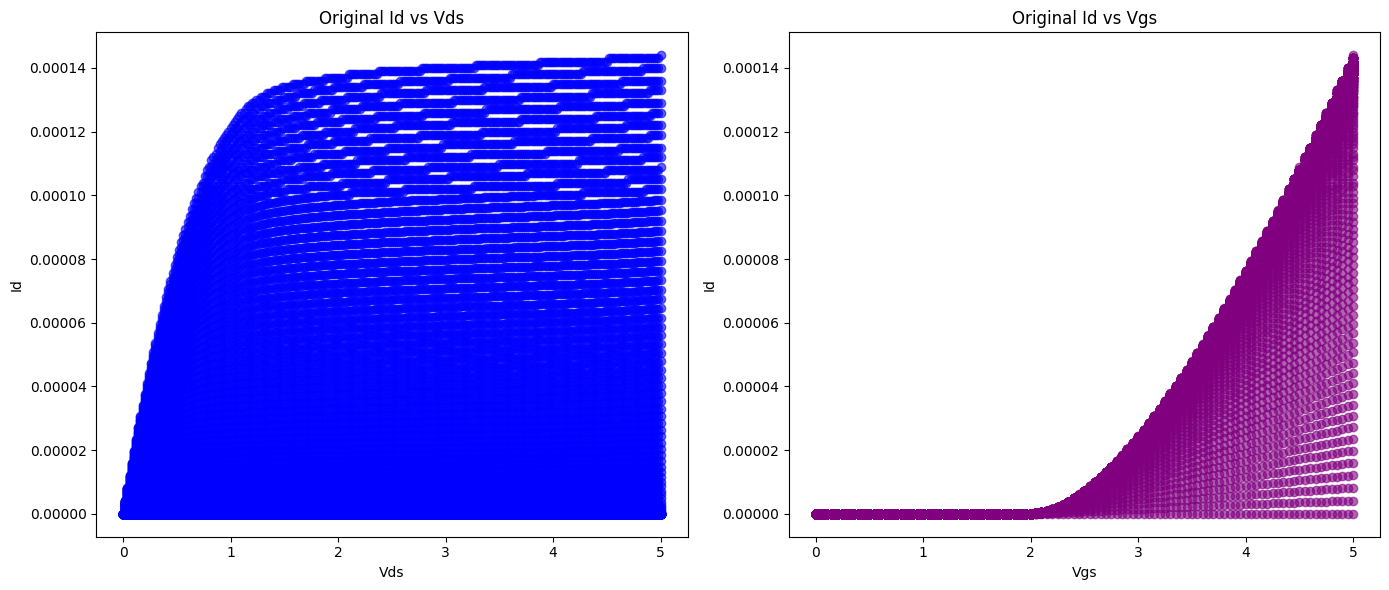

In [4]:
plt.figure(figsize=(14, 6))

# Plot Id vs. Vds (Original)
plt.subplot(1, 2, 1)
plt.scatter(data['Vds'], data['Id'], alpha=0.6, color='blue')
plt.title('Original Id vs Vds')
plt.xlabel('Vds')
plt.ylabel('Id')

# Plot Id vs. Vgs (Original)
plt.subplot(1, 2, 2)
plt.scatter(data['Vgs'], data['Id'], alpha=0.6, color='purple')
plt.title('Original Id vs Vgs')
plt.xlabel('Vgs')
plt.ylabel('Id')

plt.tight_layout()
plt.show()


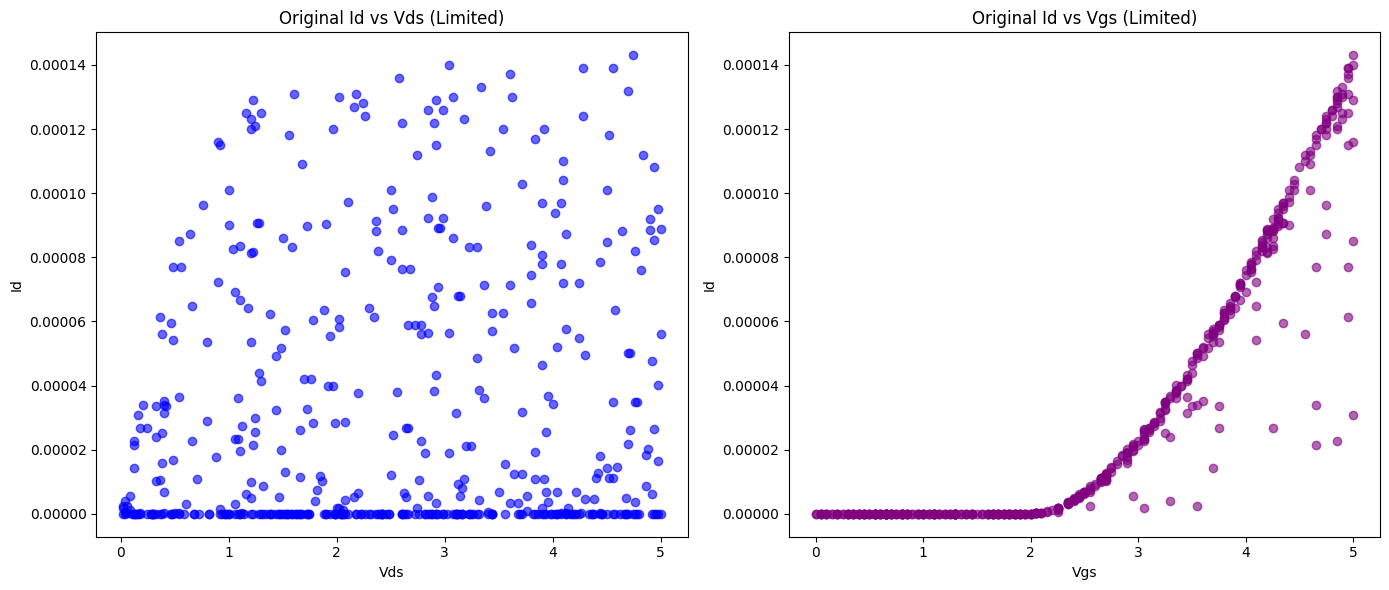

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the number of points to plot (reduce clutter)
num_points = 500  # Adjust this to control the number of points shown

# Randomly sample data (if the dataset is large)
if len(data) > num_points:
    data_sampled = data.sample(n=num_points, random_state=42)  # Random subset
else:
    data_sampled = data  # Use all data if it's small

plt.figure(figsize=(14, 6))

# Plot Id vs. Vds (Original) with limited points
plt.subplot(1, 2, 1)
plt.scatter(data_sampled['Vds'], data_sampled['Id'], alpha=0.6, color='blue')
plt.title('Original Id vs Vds (Limited)')
plt.xlabel('Vds')
plt.ylabel('Id')

# Plot Id vs. Vgs (Original) with limited points
plt.subplot(1, 2, 2)
plt.scatter(data_sampled['Vgs'], data_sampled['Id'], alpha=0.6, color='purple')
plt.title('Original Id vs Vgs (Limited)')
plt.xlabel('Vgs')
plt.ylabel('Id')

plt.tight_layout()
plt.show()


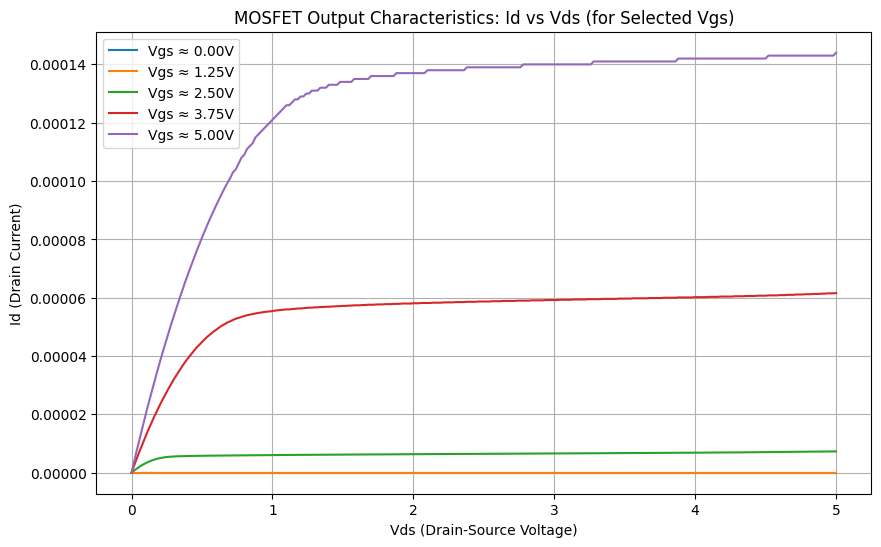

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the number of curves to plot
num_curves = 5  # Adjust this for more or fewer curves

# Select unique Vgs values from the dataset
unique_vgs_values = np.sort(data['Vgs'].unique())  # Get sorted unique Vgs values

# Select `num_curves` evenly spaced Vgs values
selected_vgs_values = np.linspace(min(unique_vgs_values), max(unique_vgs_values), num_curves)

plt.figure(figsize=(10, 6))

# Plot Id vs. Vds for selected Vgs values
for vgs in selected_vgs_values:
    vgs_filter = np.abs(data['Vgs'] - vgs) < 0.01  # Filtering for specific Vgs values
    subset = data[vgs_filter].sort_values(by="Vds")  # Sort by Vds for smooth curves

    if len(subset) > 0:  # Ensure there's data for this Vgs value
        plt.plot(subset["Vds"], subset["Id"], label=f"Vgs ≈ {vgs:.2f}V")

plt.xlabel("Vds (Drain-Source Voltage)")
plt.ylabel("Id (Drain Current)")
plt.title("MOSFET Output Characteristics: Id vs Vds (for Selected Vgs)")
plt.legend()
plt.grid(True)
plt.show()



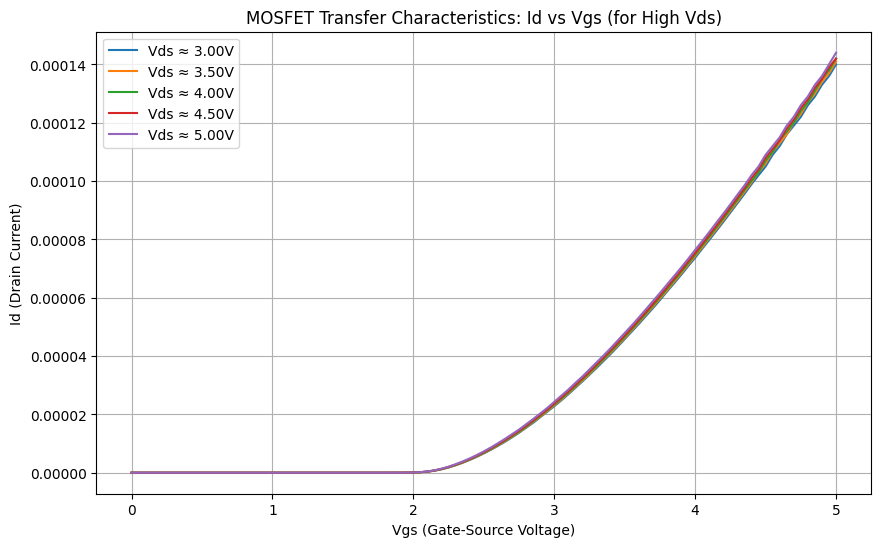

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the number of curves to plot
num_curves = 5  # Adjust to control how many Vds values are included

# Select unique Vds values from the dataset
unique_vds_values = np.sort(data['Vds'].unique())  # Get sorted unique Vds values

# Select higher Vds values (upper part of the range)
selected_vds_values = np.linspace(max(unique_vds_values) * 0.6, max(unique_vds_values), num_curves)

plt.figure(figsize=(10, 6))

# Plot Id vs. Vgs for selected Vds values
for vds in selected_vds_values:
    vds_filter = np.abs(data['Vds'] - vds) < 0.01  # Filtering for specific Vds values
    subset = data[vds_filter].sort_values(by="Vgs")  # Sort by Vgs for smooth curves

    if len(subset) > 0:  # Ensure there's data for this Vds value
        plt.plot(subset["Vgs"], subset["Id"], label=f"Vds ≈ {vds:.2f}V")

plt.xlabel("Vgs (Gate-Source Voltage)")
plt.ylabel("Id (Drain Current)")
plt.title("MOSFET Transfer Characteristics: Id vs Vgs (for High Vds)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
fig = px.scatter_3d(data, x='Vds', y='Vgs', z='Id', color='Id', opacity=0.7)
fig.update_layout(
    title='Interactive 3D Plot of Id as a Function of Vds and Vgs',
    scene=dict(
        xaxis_title='Vds (Drain-Source Voltage)',
        yaxis_title='Vgs (Gate-Source Voltage)',
        zaxis_title='Id (Drain Current)'
    )
)
fig.show()


In [9]:
# Separate features and target variable
X = data[['Vds', 'Vgs']]  # Features
y = data['Id']  # Target variable



In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the input features
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale the target variable (Id)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()



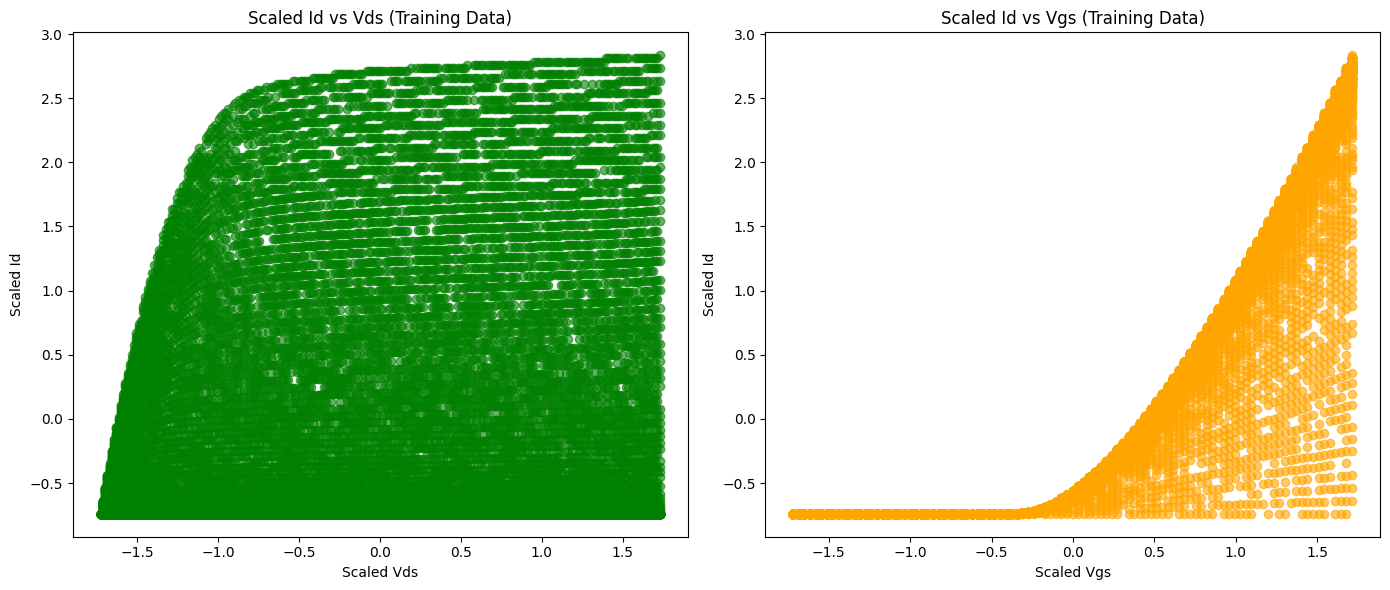

In [12]:
plt.figure(figsize=(14, 6))

# Plot Id vs. Scaled Vds
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], y_train, alpha=0.6, color='green')
plt.title('Scaled Id vs Vds (Training Data)')
plt.xlabel('Scaled Vds')
plt.ylabel('Scaled Id')

# Plot Id vs. Scaled Vgs
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 1], y_train, alpha=0.6, color='orange')
plt.title('Scaled Id vs Vgs (Training Data)')
plt.xlabel('Scaled Vgs')
plt.ylabel('Scaled Id')

plt.tight_layout()
plt.show()


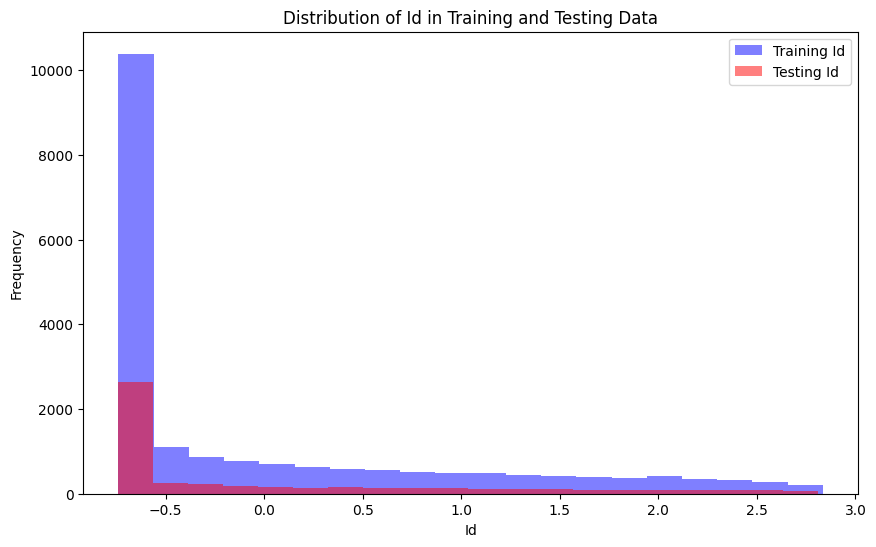

In [13]:
plt.figure(figsize=(10, 6))

# Histogram of Id in Training Data
plt.hist(y_train, bins=20, alpha=0.5, label='Training Id', color='blue')
# Histogram of Id in Testing Data
plt.hist(y_test, bins=20, alpha=0.5, label='Testing Id', color='red')

plt.title('Distribution of Id in Training and Testing Data')
plt.xlabel('Id')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Epoch 1/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1816 - mae: 0.2615 - val_loss: 0.0189 - val_mae: 0.0586
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0135 - mae: 0.0527 - val_loss: 0.0096 - val_mae: 0.0342
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - mae: 0.0339 - val_loss: 0.0041 - val_mae: 0.0269
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029 - mae: 0.0236 - val_loss: 0.0018 - val_mae: 0.0134
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mae: 0.0150 - val_loss: 0.0012 - val_mae: 0.0131
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4227e-04 - mae: 0.0127 - val_loss: 3.8465e-04 - val_mae: 0.0080
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7600e-04 - mae: 0.0111 - val_loss: 2.1476e-04 - val_mae: 0.0077
Epoch 8/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0141e-04 - mae: 0.0088 - val_loss: 3.7337e-04 - val_mae: 0.0114
Epoch 9/100
507/507 ━━━━

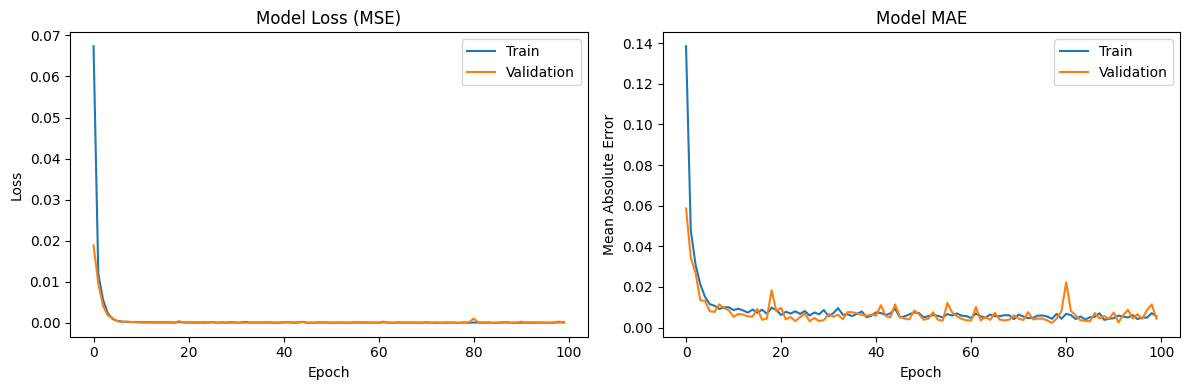

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8063e-05 - mae: 0.0042
Test Loss (MSE): 4.684675150201656e-05
Test MAE: 0.0042136129923164845
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted Id: 3.846e-05, Actual Id: 3.820e-05
Predicted Id: 2.833e-05, Actual Id: 2.820e-05
Predicted Id: 9.702e-05, Actual Id: 9.680e-05
Predicted Id: 7.913e-08, Actual Id: 4.630e-11
Predicted Id: 4.234e-05, Actual Id: 4.200e-05


In [14]:
# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer specifying the shape of input data
    Dense(64, activation='relu'),      # First hidden layer
    Dense(64, activation='relu'),      # Second hidden layer
    Dense(1)                           # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

# Make predictions and reverse scale
predictions = model.predict(X_test)
predictions_original_scale = scaler_y.inverse_transform(predictions).flatten()
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Display a few predictions vs actual values
for i in range(5):
    print(f"Predicted Id: {predictions_original_scale[i]:.3e}, Actual Id: {y_test_original_scale[i]:.3e}")

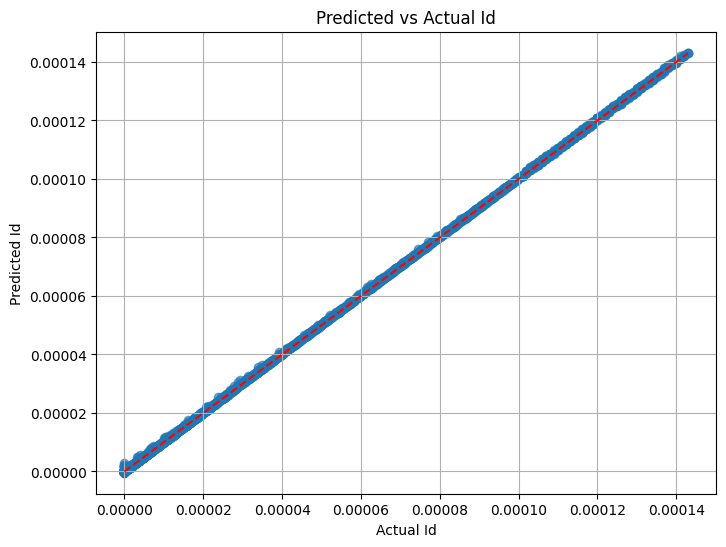

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_scale, predictions_original_scale, alpha=0.6)
plt.plot([min(y_test_original_scale), max(y_test_original_scale)], 
         [min(y_test_original_scale), max(y_test_original_scale)], 
         color='red', linestyle='--')  # Reference line y=x for perfect predictions
plt.xlabel('Actual Id')
plt.ylabel('Predicted Id')
plt.title('Predicted vs Actual Id')
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test_original_scale, predictions_original_scale)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 7.600093440990495e-14
Root Mean Squared Error (RMSE): 2.756826697670801e-07


In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_scale, predictions_original_scale)
print("R-squared (R2):", r2)


R-squared (R2): 0.999954041064277


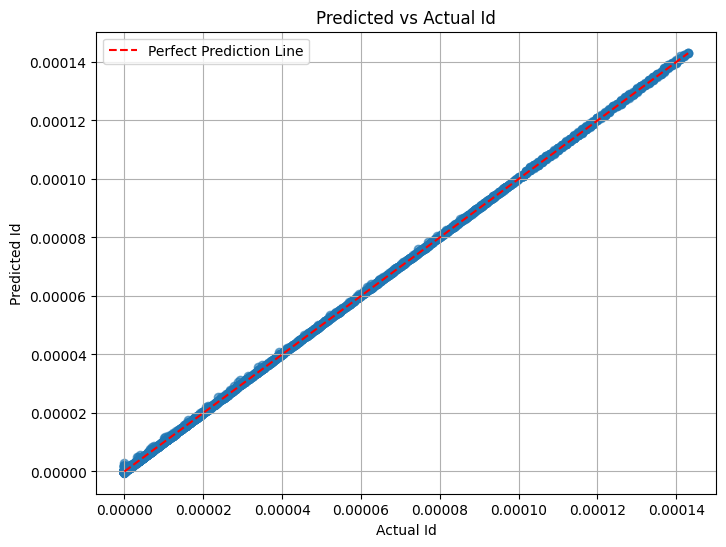

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_scale, predictions_original_scale, alpha=0.6)
plt.plot([min(y_test_original_scale), max(y_test_original_scale)], 
         [min(y_test_original_scale), max(y_test_original_scale)], 
         color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Id')
plt.ylabel('Predicted Id')
plt.title('Predicted vs Actual Id')
plt.legend()
plt.grid(True)
plt.show()


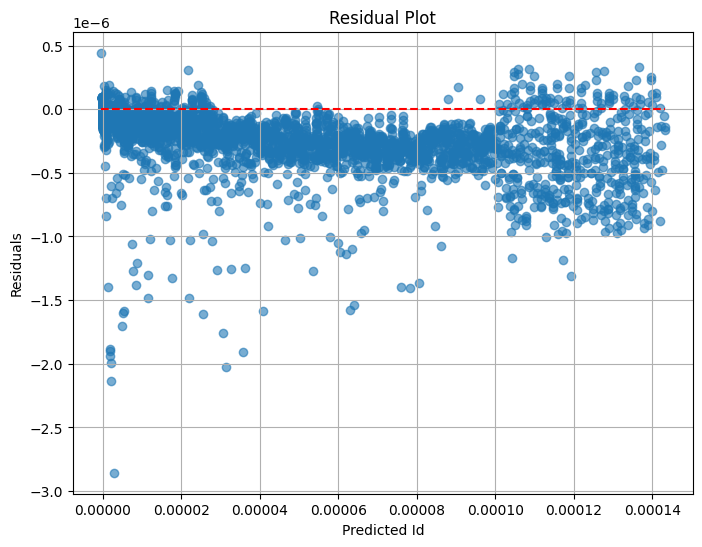

In [19]:
residuals = y_test_original_scale - predictions_original_scale

plt.figure(figsize=(8, 6))
plt.scatter(predictions_original_scale, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(predictions_original_scale), xmax=max(predictions_original_scale), colors='red', linestyles='--')
plt.xlabel('Predicted Id')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


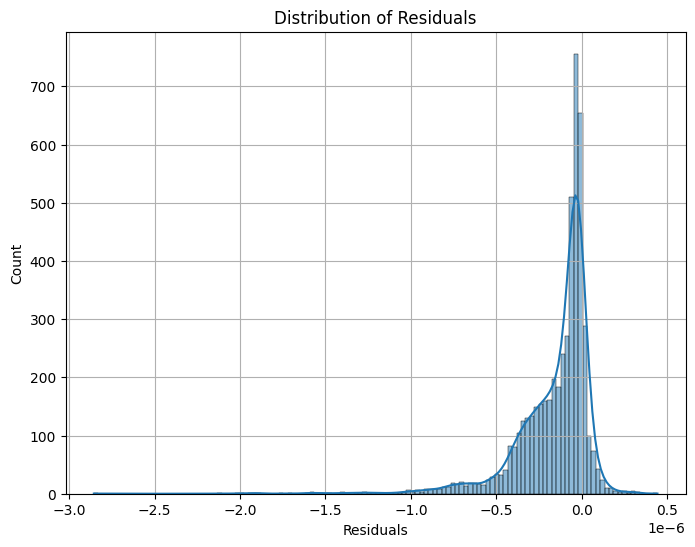

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()



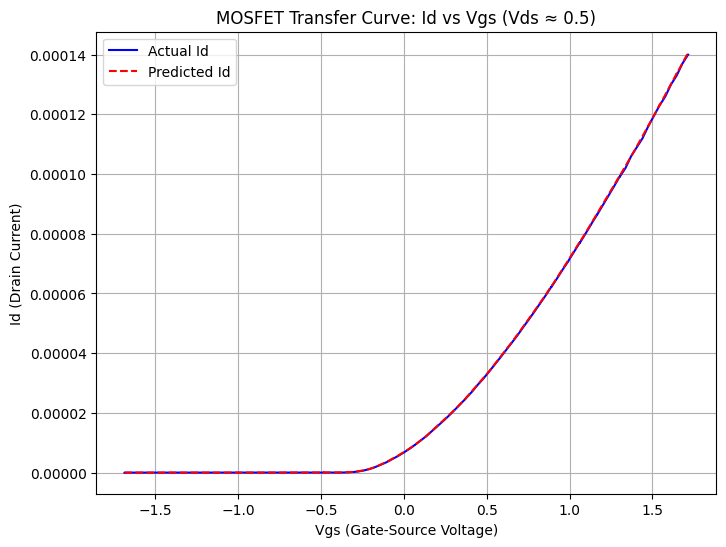

In [21]:

# Specify the desired Vds value (or close to this value) for the transfer curve
target_vds = 0.5  # Example value, adjust this based on your data

# Define a tolerance level to filter for similar Vds values
tolerance = 0.05

# Filter the test data for the specified Vds value
vds_filter = np.abs(X_test[:, 0] - target_vds) < tolerance  # Assuming Vds is the first column in X_test
X_test_filtered = X_test[vds_filter]
y_test_filtered = y_test_original_scale[vds_filter]
predictions_filtered = predictions_original_scale[vds_filter]

# Sort filtered data by Vgs for smooth plotting
sorted_indices = X_test_filtered[:, 1].argsort()  # Sort by Vgs (second column)
X_test_sorted = X_test_filtered[sorted_indices]
y_test_sorted = y_test_filtered[sorted_indices]
predictions_sorted = predictions_filtered[sorted_indices]

# Plot the MOSFET transfer curve for actual and predicted Id vs Vgs
plt.figure(figsize=(8, 6))
plt.plot(X_test_sorted[:, 1], y_test_sorted, label="Actual Id", color="blue", linestyle="-")
plt.plot(X_test_sorted[:, 1], predictions_sorted, label="Predicted Id", color="red", linestyle="--")
plt.xlabel("Vgs (Gate-Source Voltage)")
plt.ylabel("Id (Drain Current)")
plt.title(f"MOSFET Transfer Curve: Id vs Vgs (Vds ≈ {target_vds})")
plt.legend()
plt.grid(True)
plt.show()


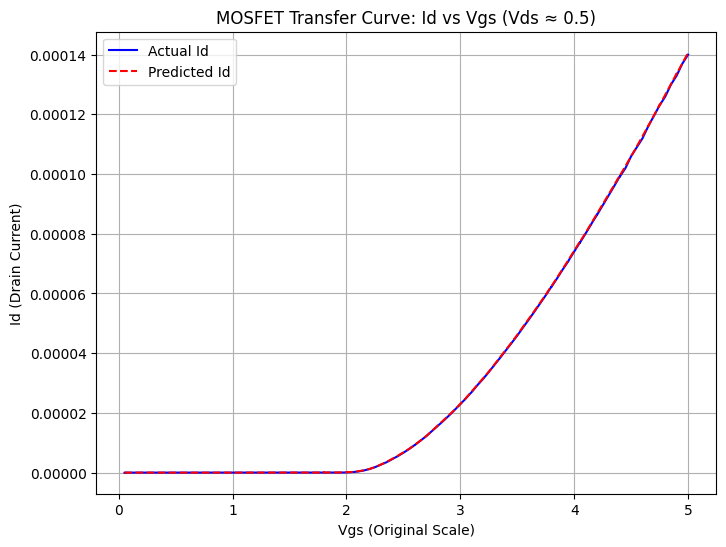

In [22]:
# Specify the desired Vds value (or close to this value) for the transfer curve
target_vds = 0.5  # Example value, adjust this based on your data

# Define a tolerance level to filter for similar Vds values
tolerance = 0.05

# Filter the test data for the specified Vds value
vds_filter = np.abs(X_test[:, 0] - target_vds) < tolerance  # Assuming Vds is the first column in X_test
X_test_filtered = X_test[vds_filter]
y_test_filtered = y_test_original_scale[vds_filter]
predictions_filtered = predictions_original_scale[vds_filter]

# Sort filtered data by Vgs for smooth plotting
sorted_indices = X_test_filtered[:, 1].argsort()  # Sort by Vgs (second column)
X_test_sorted = X_test_filtered[sorted_indices]
y_test_sorted = y_test_filtered[sorted_indices]
predictions_sorted = predictions_filtered[sorted_indices]

# Convert Vgs back to original scale
Vgs_original = scaler_X.inverse_transform(X_test_sorted)[:, 1]  # Extract only the second column

# Plot the MOSFET transfer curve for actual and predicted Id vs Vgs
plt.figure(figsize=(8, 6))
plt.plot(Vgs_original, y_test_sorted, label="Actual Id", color="blue", linestyle="-")
plt.plot(Vgs_original, predictions_sorted, label="Predicted Id", color="red", linestyle="--")
plt.xlabel("Vgs (Original Scale)")
plt.ylabel("Id (Drain Current)")
plt.title(f"MOSFET Transfer Curve: Id vs Vgs (Vds ≈ {target_vds})")
plt.legend()
plt.grid(True)
plt.show()


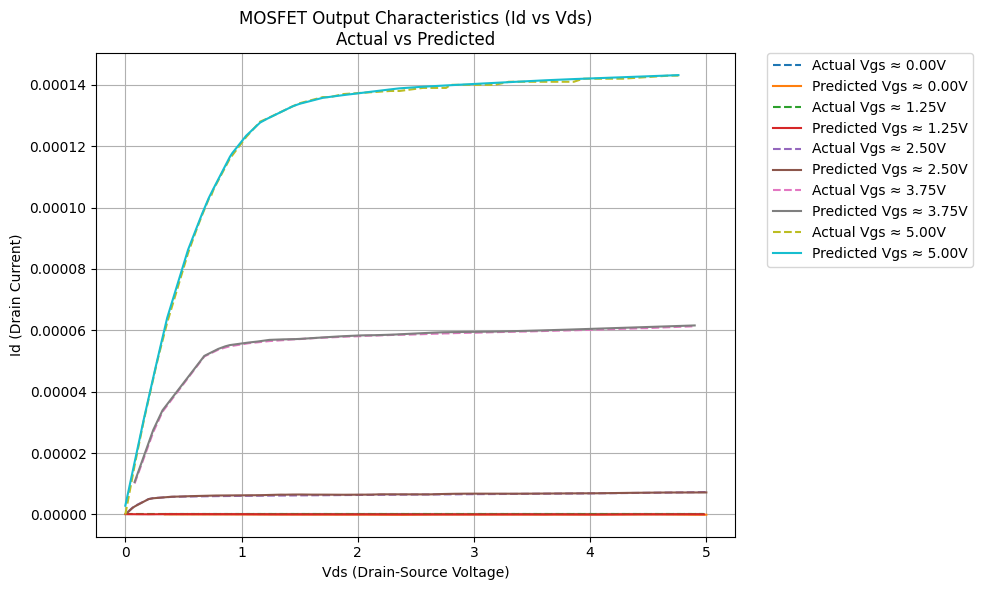

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reconstruct test data (X_test was scaled, so we inverse it)
X_test_original = scaler_X.inverse_transform(X_test)
df_test = pd.DataFrame(X_test_original, columns=['Vds', 'Vgs'])
df_test['Actual_Id'] = y_test_original_scale
df_test['Predicted_Id'] = predictions_original_scale

# Select a few Vgs values to plot curves
num_curves = 5
unique_vgs = np.sort(df_test['Vgs'].unique())
selected_vgs = np.linspace(unique_vgs.min(), unique_vgs.max(), num_curves)

plt.figure(figsize=(10, 6))

for vgs in selected_vgs:
    mask = np.abs(df_test['Vgs'] - vgs) < 0.01
    subset = df_test[mask].sort_values(by='Vds')

    if not subset.empty:
        plt.plot(subset['Vds'], subset['Actual_Id'], label=f'Actual Vgs ≈ {vgs:.2f}V', linestyle='--')
        plt.plot(subset['Vds'], subset['Predicted_Id'], label=f'Predicted Vgs ≈ {vgs:.2f}V', linestyle='-')

plt.xlabel("Vds (Drain-Source Voltage)")
plt.ylabel("Id (Drain Current)")
plt.title("MOSFET Output Characteristics (Id vs Vds)\nActual vs Predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()
